# Desafío 1 - Properati - Limpieza de datos y análisis exploratorio  

La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades para venta y alquiler. 

<b> En este proyecto nos proponemos desarrollar un modelo de regresión que permita predecir el precio en dólares por metro cuadrado de una propiedad. El objetivo final, es desarrollar un tasador automático para ser aplicado a las próximas propiedades que sean comercializadas por la empresa.</b>

Para ello, la empresa le provee de un dataset correspondiente al primer semestre de 2017. En este entonces, el tipo de cambio de la moneda dólar a pesos argentinos era de $17.65. 

Será importante tener en cuenta el problema de la <i>influencia espacial en los precios por metro cuadrado</i>. En efecto, es probable que existan diferencias importantes de en las diferentes geografías, barrios y zonas analizadas.


Objetivos de la primera etapa:

● Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.

● Realizar un análisis descriptivo de las principales variables.

● Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

Para la presentación en clase se deben armar algunos slides no técnicos para exponer en no más de 10 minutos (PPT o Google Slides). 
La presentación debe constar:
* una introducción (planteo del problema, la pregunta, la descripción del dataset, etc.) 
* un desarrollo de los análisis realizados (análisis descriptivo, análisis de correlaciones preliminares, visualizaciones preliminares) 
* una exposición de los principales resultados y conclusiones.

## Introducción

Problema: automatizar el proceso de predecir el precio por metro cuadrado de una propiedad en USD, creando así un tasador automático.

Entonces, ¿a qué features nos debemos basar para predecir el valor?
¿Cómo sería el data set ideal?


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab1_fig2_datascience_methodology_flowchart.png" width = 500> 

Vamos a definir el enfoque analítico para resolver el problema, identificando qué tipo de patrones serán necesarios para abordar en el futuro un análisis de regresión y así poder predecir el precio de venta del m2 de inmuebles según su ubicación y cantidad de ambientes. 

## Preparación de datos

En esta etapa vamos a hacer un análisis exploratorio del data set. Visualizaremos los datos de las variables, eliminaremos lo que no nos aporta información significativa y plantearemos los problemas a resolver.

In [368]:
#Para comenzar, importamos las librerías necesarias para la manipulación de datos y el data set. 
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("properatti.csv", index_col=0) #Utilizamos la primera columna de índice

In [369]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [370]:
df.shape #Observamos el tamaño del data set

(121220, 25)

In [371]:
## visualizacion del antes para compararrrrrrrrrrrrrrrr

In [372]:
#Observamos las variables 
df.columns 

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [373]:
#Las renombramos
df.rename(columns={"Unnamed: 0":"a","operation":"operacion","property_type":"tipo_inmueble","place_name":"barrio","place_with_parent_names":"localizacion","country_name":"argentina","state_name":"localidad","geonames_id":"id_geoname","lat-lon":"coordenadas","lat":"latitud","lon":"longitud","price":"precio","currency":"moneda","price_aprox_local_currency":"precio_pesos","price_aprox_usd":"precio_usd","surface_total_in_m2":"sup_total","surface_covered_in_m2":"sup_cubierta","price_usd_per_m2":"precio_usd_sup","price_per_m2":"precio_pesos_sup","floor":"nivel","rooms":"ambientes","expenses":"expensas","properati_url":"url","description":"observaciones","title":"titulo","image_thumbnail":"url_imagen"}, inplace=True)

In [374]:
#Para entender la información, vemos las columnas en una muestra aleatoria de 10 casos.
pd.set_option('display.max_columns', 500)
df.sample(10) 

,operacion,tipo_inmueble,barrio,localizacion,argentina,localidad,id_geoname,coordenadas,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,nivel,ambientes,expensas,url,observaciones,titulo,url_imagen
56256,sell,apartment,Neuquén,|Argentina|Neuquén|Neuquén|,Argentina,Neuquén,3843123.0,"-38.9468354,-68.0561303",-38.946835,-68.056130,NaN,NaN,NaN,NaN,78.0,78.0,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/19qi8_venta_depart...,Venta de Departamento 3 DORMITORIOS en Área ce...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/4/FMMbm7NNHBix4i...
30415,sell,house,Solar del Bosque,|Argentina|Bs.As. G.B.A. Zona Sur|Ezeiza|Solar...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.905572,-58.507261",-34.905572,-58.507261,370000.0,USD,6528465.00,370000.00,NaN,270.0,NaN,1370.370370,NaN,7.0,NaN,http://www.properati.com.ar/181b1_venta_casa_s...,Corredor Responsable: Martin Manias - CMCLZ 40...,Barrio Privado - Solar del Bosque,https://thumbs4.properati.com/3/iqZgeJ5fek1NkJ...
54717,sell,apartment,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,Argentina,Buenos Aires Costa Atlántica,3429971.0,"-37.113351309,-56.8638168625",-37.113351,-56.863817,250000.0,USD,4411125.00,250000.00,111.0,NaN,2252.252252,NaN,NaN,5.0,NaN,http://www.properati.com.ar/19noo_venta_depart...,"Departamento, tipo duplexHermoso departamento ...",3229 - Marinas 10,https://thumbs4.properati.com/5/0dllHOS68lhrxr...
63406,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0058586,-57.5423215",-38.005859,-57.542321,47000.0,USD,829291.50,47000.00,25.0,25.0,1880.000000,1880.000000,NaN,1.0,NaN,http://www.properati.com.ar/1a8s7_venta_depart...,"Venta. Departamento de 1 ambiente interno, rec...",Departamento en Venta. Ambiente. Dormitorio. 2...,https://thumbs4.properati.com/2/72LI2zcHPwz6x4...
39429,sell,house,Villa del Parque,|Argentina|Capital Federal|Villa del Parque|,Argentina,Capital Federal,3427455.0,"-34.6049435,-58.4811575",-34.604943,-58.481158,295000.0,USD,5205127.50,295000.00,172.0,127.0,1715.116279,2322.834646,NaN,4.0,NaN,http://www.properati.com.ar/18obe_venta_casa_v...,Venta DUPLEX 4 AMBIENTES + DEPENDENCIA +GARAGE...,CASA EN VENTA,https://thumbs4.properati.com/5/DPHXS5QPBKwZDD...
87564,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,NaN,1550000.0,ARS,1533830.91,86929.69,52.0,42.0,1671.724808,36904.761905,NaN,NaN,NaN,http://www.properati.com.ar/1b638_venta_depart...,"Departamento ubicado en un 8º piso Frente, con...",Departamento - Nueva Cordoba,https://thumbs4.properati.com/8/kttssFJdK1no6Z...
41588,sell,house,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Argentina,Córdoba,3832791.0,"-31.420572,-64.49949",-31.420572,-64.499490,550000.0,USD,9704475.00,550000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/18ukb_venta_casa_v...,CÓD: CB08El complejo de 5 cabañas situado en u...,CB08- Hermoso complejo de 5 cabañas en country,https://thumbs4.properati.com/1/cs_0mXihXctwWn...
71561,sell,house,City Bell,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Cit...,Argentina,Bs.As. G.B.A. Zona Sur,3435379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,200.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1al47_venta_casa_c...,"Propiedad puramente fin comercial, excelente e...",Casa en venta Fin Comercial City Bell 473 bis ...,https://thumbs4.properati.com/0/D5x_EVLndC6_Zz...
101785,sell,apartment,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Argentina,Capital Federal,3427451.0,NaN,NaN,NaN,100000.0,USD,1764450.00,100000.00,41.0,NaN,2439.024390,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1bpst_venta_depart...,Departamento de un ambiente divisible. Superfi...,Departamento - Villa Devoto,https://thumbs4.properati.com/7/xRbbL50axCgYLV...
112312,sell,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,Argentina,Capital Federal,3428113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,29.0,NaN,NaN,NaN,NaN,NaN,ht

In [375]:
df.describe()

,id_geoname,latitud,longitud,precio,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,nivel,ambientes,expensas
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [376]:
#Verificando la cantidad de nulos
df.isnull().sum()

operacion                0
tipo_inmueble            0
barrio                  23
localizacion             0
argentina                0
localidad                0
id_geoname           18717
coordenadas          51550
latitud              51550
longitud             51550
precio               20410
moneda               20411
precio_pesos         20410
precio_usd           20410
sup_total            39328
sup_cubierta         19907
precio_usd_sup       52603
precio_pesos_sup     33562
nivel               113321
ambientes            73830
expensas            106958
url                      0
observaciones            2
titulo                   0
url_imagen            3112
dtype: int64

In [377]:
missing_data = df.isnull()
missing_data.head()

,operacion,tipo_inmueble,barrio,localizacion,argentina,localidad,id_geoname,coordenadas,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,nivel,ambientes,expensas,url,observaciones,titulo,url_imagen
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False


In [378]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

operacion
False    121220
Name: operacion, dtype: int64

tipo_inmueble
False    121220
Name: tipo_inmueble, dtype: int64

barrio
False    121197
True         23
Name: barrio, dtype: int64

localizacion
False    121220
Name: localizacion, dtype: int64

argentina
False    121220
Name: argentina, dtype: int64

localidad
False    121220
Name: localidad, dtype: int64

id_geoname
False    102503
True      18717
Name: id_geoname, dtype: int64

coordenadas
False    69670
True     51550
Name: coordenadas, dtype: int64

latitud
False    69670
True     51550
Name: latitud, dtype: int64

longitud
False    69670
True     51550
Name: longitud, dtype: int64

precio
False    100810
True      20410
Name: precio, dtype: int64

moneda
False    100809
True      20411
Name: moneda, dtype: int64

precio_pesos
False    100810
True      20410
Name: precio_pesos, dtype: int64

precio_usd
False    100810
True      20410
Name: precio_usd, dtype: int64

sup_total
False    81892
True     39328
Name: sup_total, dty

<b>¿Cómo lidiar con los datos faltantes?</b>


a) soltar datos

b) soltar toda la fila

c) soltar toda la columna


<b>Reemplazar datos</b>


a) reemplazarlo por medio

b) reemplazarlo por frecuencia

c) reemplazarlo en función de otras funciones

In [379]:
#Separamos las variables cualitativas y cuantitativas
variables = pd.DataFrame({'cualitativas': ["operacion", "tipo_inmueble", "barrio","localizacion","argentina","localidad","moneda","url","observaciones","titulo","url_imagen",0,0,0],
                    'cuantitativas': ["id_geoname","coordenadas","latitud","longitud","precio","precio_pesos","precio_usd","sup_total","sup_cubierta","precio_usd_sup","precio_pesos_sup","nivel","ambientes","expensas"]})

display(variables)

,cualitativas,cuantitativas
0,operacion,id_geoname
1,tipo_inmueble,coordenadas
2,barrio,latitud
3,localizacion,longitud
4,argentina,precio
5,localidad,precio_pesos
6,moneda,precio_usd
7,url,sup_total
8,observaciones,sup_cubierta
9,titulo,precio_usd_sup


In [380]:
#Borramos las variables que no nos interesan para este proyecto

df.drop(columns="argentina", inplace=True)
df.drop(columns="url", inplace=True)
df.drop(columns="url_imagen", inplace=True)
#df.drop(columns="latitud", inplace=True)
#df.drop(columns="longitud", inplace=True)
df.drop(columns="nivel", inplace=True)
df.drop(columns="coordenadas", inplace=True)

<h5>Con una lectura inicial del dataframe, me permite observar:</h5>

* Todas las publicaciones de propiedades son de venta y en Argentina. Por lo tanto, decidimos eliminar las columnas operación y Argentina. 

* Eliminamos las variables url, url_imagen al no aportar información relevante a la fecha, después de usará para web scraping. Hacemos un boxplot de la columna de nivel porque hay muchos datos faltantes, verificamos su utilidad (mayores a 100 pasarlos a NaN).

* Disponemos de georeferencia en la mayoría de las observaciones. En algunos casos hay nulos en el geopoint. 

-----------------------------------------------------------
* Identificamos los casos con datos duplicados según id_geoname. En el caso que se trate de diferentes tipos de propiedad, ambientes y niveles, los dejamos.

* Podemos observar precios en ARS y USD. Este dato requiere mayor análisis y algún tipo de normalización. Eliminamos los datos de otras monedas. Podríamos traer todos los datos que sean iguales en ambas columnas y unificar el precio en dólares respetando el tipo de cambio del primer semestre del año 2017.

* Verificar que sup_cubierta sea menor que la sup_total.

* Unificar las variables precio, precio_usd, precio_pesos, precio_usd_sup, precio_pesos_sup, para dejar solo una en su lugar "precio_usd_m2". 

    * Hay campos de superficie de la propiedad que son NaN y es una variable de muchísima importancia. Vamos a calcularlo con la división de precio por propiedad y precio por metro cuadrado. 

    * Hay campos de precio por m2 de la propiedad que son NaN. Vamos a calcularlo con la división de precio por propiedad y metro cuadrado.

    * Hay campos de precio de la propiedad que son NaN. Vamos a calcularlo con la multiplicación de precio por m2 y metro cuadrado.

* El campo con las expensas presenta muchos nulos. Se podría pensar hay propiedades que no pagan expensas. Es necesario analizar este dato y adoptar una estrategia.

* El campo con cantidad de ambientes tiene muchos nulos y, en principio, es muy importante para el análisis del dataset. Es posible extraer este dato de la columna Observaciones y/o Título.


## Comenzamos a explorar el contenido de cada variable

En este apartado, recorreremos cada variable para entender su contenido con herramentas como pivot_table, group_by, box-plots, etc e implementaremos estrategias para completar los valores faltantes. 

### VARIABLES CATEGÓRICAS

### Tipo de Inmueble

In [381]:
#Vemos el contenido de tipo_inmuebles
df.groupby("operacion").groups

{'sell': Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             121210, 121211, 121212, 121213, 121214, 121215, 121216, 121217,
             121218, 121219],
            dtype='int64', length=121220)}

In [382]:
#Al observar que todas las operaciones son ventas, entendemos la naturaleza del dataframe y borramos la variable
df.drop(columns="operacion", inplace=True)

In [383]:
df.tipo_inmueble.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: tipo_inmueble, dtype: int64

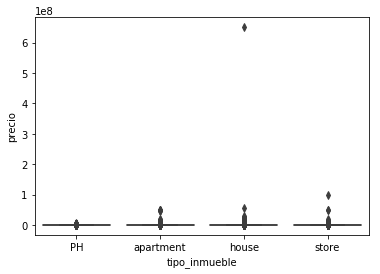

In [384]:
sns.boxplot(x="tipo_inmueble", y="precio", data=df)

### Localidad

In [385]:
df.pivot_table(index='localidad', aggfunc={'localidad':"count"})

,localidad
localidad,
Bs.As. G.B.A. Zona Norte,25560
Bs.As. G.B.A. Zona Oeste,9322
Bs.As. G.B.A. Zona Sur,13952
Buenos Aires Costa Atlántica,10006
Buenos Aires Interior,2291
Capital Federal,32316
Catamarca,27
Chaco,57
Chubut,259


### Moneda

In [386]:
df.moneda.value_counts()


USD    87587
ARS    13219
PEN        2
UYU        1
Name: moneda, dtype: int64

In [387]:
df[df["moneda"]== "PEN"]

,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo
50387,apartment,Capital Federal,|Argentina|Capital Federal|,Capital Federal,3433955.0,NaN,NaN,380000.0,PEN,2066864.90,117139.33,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...,DUPLEX A LA VENTA | Liniers 1200 | Tandil
50388,apartment,Capital Federal,|Argentina|Capital Federal|,Capital Federal,3433955.0,NaN,NaN,950000.0,PEN,5167162.35,292848.33,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil


In [388]:
#Eliminamos los datos de moneda peruana y uruguaya, son pocos y la información relevante está vacía
df.drop(labels=107390, axis=0, inplace=True)
df.drop(labels=50388, axis=0, inplace=True)
df.drop(labels=50387, axis=0, inplace=True)

In [389]:
#Tomamos el tipo de cambio del primer semestre 2017
tipo_de_cambio = (df['precio_pesos']/df['precio_usd'])[1]
tipo_de_cambio

17.6445

In [390]:
#Para que no haya valores en moneda local y que falte en dólares, dado que me quiero quedar sólo con la columna en dólares.
df[(df.precio.isnull() == False) & (df.precio_usd.isnull() == True)]

,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo


In [391]:
df.groupby(by='moneda').count()

,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo
moneda,,,,,,,,,,,,,,,,,,
ARS,13219,13219,13219,13219,12408,6011,6011,13219,13219,13219,8546,10428,8484,10428,3564,594,13218,13219
USD,87587,87564,87587,87587,71446,52536,52536,87587,87587,87587,60320,77232,60133,77230,36014,12652,87586,87587


### Barrio

In [392]:
#Al ver que todos son de Tigre, los llenamos
df['barrio'] = df['barrio'].fillna("Tigre")

In [393]:
df.iloc[[6489]]

,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo
6489,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,-34.400897,-58.638098,650000.0,USD,11468925.0,650000.0,240.0,240.0,2708.333333,2708.333333,NaN,NaN,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre


In [394]:
#Vemos que los barrios de dato "centro" son todos de Mar del Plata. Reemplazamos el valor
df[df['barrio'] == 'Centro'].head(21)

,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...
5187,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,-38.004643,-57.545481,59000.0,USD,1041025.5,59000.0,NaN,NaN,NaN,NaN,NaN,NaN,VENTA DEPARTAMENTO DE 2 AMBIENTES LATERAL MUY ...,VENTA DEPARTAMENTO ZONA CENTRO 2 AMBIENTES LA...
6109,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,NaN,NaN,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN,4.0,NaN,"Dpto en P.H Edificio Plaza. Piso 10 dpto E , ...",DEPARTAMENTO EN VENTA
8644,store,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,-38.003170,-57.548572,120000.0,USD,2117340.0,120000.0,30.0,30.0,4000.000000,4000.000000,NaN,NaN,LOCAL EN VENTA CENTRO. Oportunidad buena obica...,VENTA DE LOCAL
10349,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,-37.998698,-57.546018,52000.0,USD,917514.0,52000.0,33.0,NaN,1575.757576,NaN,2.0,NaN,Departamento de 2 ambientes contrafrente en Ex...,Departamento de 2 ambientes en el centro. Sobr...
12069,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,NaN,NaN,NaN,NaN,NaN,NaN,240.0,200.0,NaN,NaN,4.0,NaN,VENTA DEPARTAMENTO 4 AMBIENTES EN MAR DEL PLAT...,DEPARTAMENTO EN VENTA
12076,store,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,NaN,NaN,NaN,NaN,LOCALVENTA LOCAL EN MAR DEL PLATA.LOCAL DE 3 x...,LOCAL EN VENTA
12123,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,NaN,NaN,65000.0,USD,1146892.5,65000.0,46.0,46.0,1413.043478,1413.043478,2.0,400.0,VENTA DEPARTAMENTO 2 AMBIENTES EN MAR DEL PLAT...,DEPARTAMENTO EN VENTA
12124,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,2.0,1800.0,VENTA DE DEPARTAMENTO EN MAR DEL PLATADEPARTAM...,DEPARTAMENTO EN VENTA
12126,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,85.0,NaN,NaN,3.0,2900.0,VENTA DEPARTAMENTO EN MAR DEL PLATA EN ZONA CE...,DEPARTAMENTO EN VENTA


In [395]:
df = df.replace('Centro', 'Mar del Plata')

### Observaciones

In [396]:
df.observaciones[12000]

'Venta de Departamento 3 AMBIENTES en Caballito.Bonifacio 1234 representa una excelente oportunidad de inversión en semipisos de 2 y 3 ambientes, sobre el radio más valorizado de Caballito. Un concepto de exclusividad con 14 unidades desarrolladas en 7 pisos, todas con disposición al frente,  recepcionando luz del norte con balcones aterrazados.El emprendimiento será construido en 24 meses, dando comienzo en mayo del corriente 2016 y teniendo la posibilidad de ingresar con un anticipo del 30% y financiar en dos años el saldo. Las unidades:Semipisos de 2 ambientes de 52.60 m2Semipisos de 3 ambientes de 71.03 m2Espacios comunes: Cocheras en planta baja optativas. No disponibles para la venta aún.Sector de laundry en octavo piso.Espacio común con terraza y parrilla. Solárium.Características técnicas:�Carpinterías exteriores de aluminio anodizado natural�Pisos de porcellanato en ambientes de living comedor, cocina y balcones. Baños en cerámicas esmaltadas. Piso flotante de 8 mm en dormitor

In [397]:
## grafico de wordcloud sobre campo observaciones para detectar info relevante a obtener regex o para el modelo

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
st=list(set(stopwords.words('spanish')))
stopwords = set(STOPWORDS)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Micaela\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [398]:
obs = ' '.join(df.fillna('')["observaciones"].tolist())

In [399]:
palabras_claves = ['metros', 'Edificio', 'ubicaciónestratégicamente', 'categoría', 'iluminación', 'perímetro','piso', 'edificio', 'ultima', 'estancias', 'cuatro', 'racionalista', 'disponible', 'haus', 'puertos', 'medios', 'observaciones', 'hermosa', 'block', 'venta', 'mendoza', 'calle', 'alcorta','terra', 'ba', 'buena', 'vitrau', 'obi', 'amb', 'plan', 'tipo', 'unico', 'villanueva', 'san', 'cuadra', 'lote', 'm2', 'mendozawg', '7600a', 'obi', 'forum', 'lom', 'independient', 'living', '88casa', 'object', 'so', 'impecab', 'Name', 'dtype', 'Length', 'ubicada', 'am', 'ubicai', 'dalí','fantástica', 'consta', 'vivir', 'almi', 'inmejorable', 'divisible', 'esquina', 'disponiblehaus', 'desnivel', 'ventas', 'ii', 'rodeados', 'mendozawh', 'mendoza', 'buen', 'mondrian', 'departame', 'calidad','dormitorio', 'departamento', 'baño', 'gran', 'av', 'completo','planta', 'do', 'inmobiliaria', 'villa', 'aluminio', 'barrio', 'cuenta', 'hall', 'principal', 'ma', 'aviso', 'agua', 'corredor', 'cubierto', 'ideal', 'cucicba', 'baja', 'mueble', 'salida', 'construcción', 'granito', 'primera', 'zona', 'hogar', 'ingreso', 'torre', 'amplio', 'pb', 'amplio', 'mesada', 'ml', 'gas', 'cuarto', 'dos', 'interiore', 'totalmente', 'caliente', 'aire', 'año', 'integrada', 'detalle', 'separada', 'usd', 'centro','cuadras', 'posee', 'parte', 'aprox', 'similar', 'galeria', 'tre', 'pisos', 'excelente', 'inmueble', 'inmobiliario', 'mt', 'terreno', 'unidade', 'pisos', 'ciudad', 'departamentos', 'intalación', 'placard', 'medida', 'plaza', 'toda', 'vidrio', 'precio', 'id', 'pb', 'total', 'encuentra', 'acero', 'cerámico', 'natural', 'cada', 'ley', 'split', 'tres', 'forma', 'obra', 'pa', 'caldera', 'marca', 'completos', 'alto', 'alta', 'depto', 'techo', 'plantas', 'horno', 'ser', 'doble', 'amplia', 'madera', 'solo', 'plano', 'alacena', 'mat', 'entrega', 'general', 'ducha', 'bacha', 'calor', 'aires', 'losa', 'medidas', 'split', 'terminacione', 'crédito', 'años', 'través', 'eléctrico', 'información', 'barra', 'diseño', 'diario', 'santa', 'uso', 'mar', 'recepción', 'córdoba', 'crédito', 'transporte', 'primer', 'revestimiento', 'código', 'línea', 'grifería', 'cada', 'mls', 'mts', 'fija', 'afip', 'mas', 'coti', 'sala', 'sector', 'null', 'libre', 'lugar', 'pueden', 'yeso', 'juego', 'mismo', 'propia', 'capital', 'semi', 'hs', 'credito', 'placare', 'propiedade', 'linea', 'altura', 'radiadore', 'cerca', 'pasillo', 'sanitario', 'termotanque', 'área', 'n°', 'cocina', 'comedor', 'publicado', 'fv', 'norte', 'peso', 'puede', 'efecto', 'club', 'consulte', 'propio', 'verde', 'anafe', 'si', 'planos', 'todas', 'privado', 'hacia', 'dato', 'mapaprop', 'pago', 'segundo', 'bueno', 'nordelta', 'abertura', 'foto']
st.extend(palabras_claves)


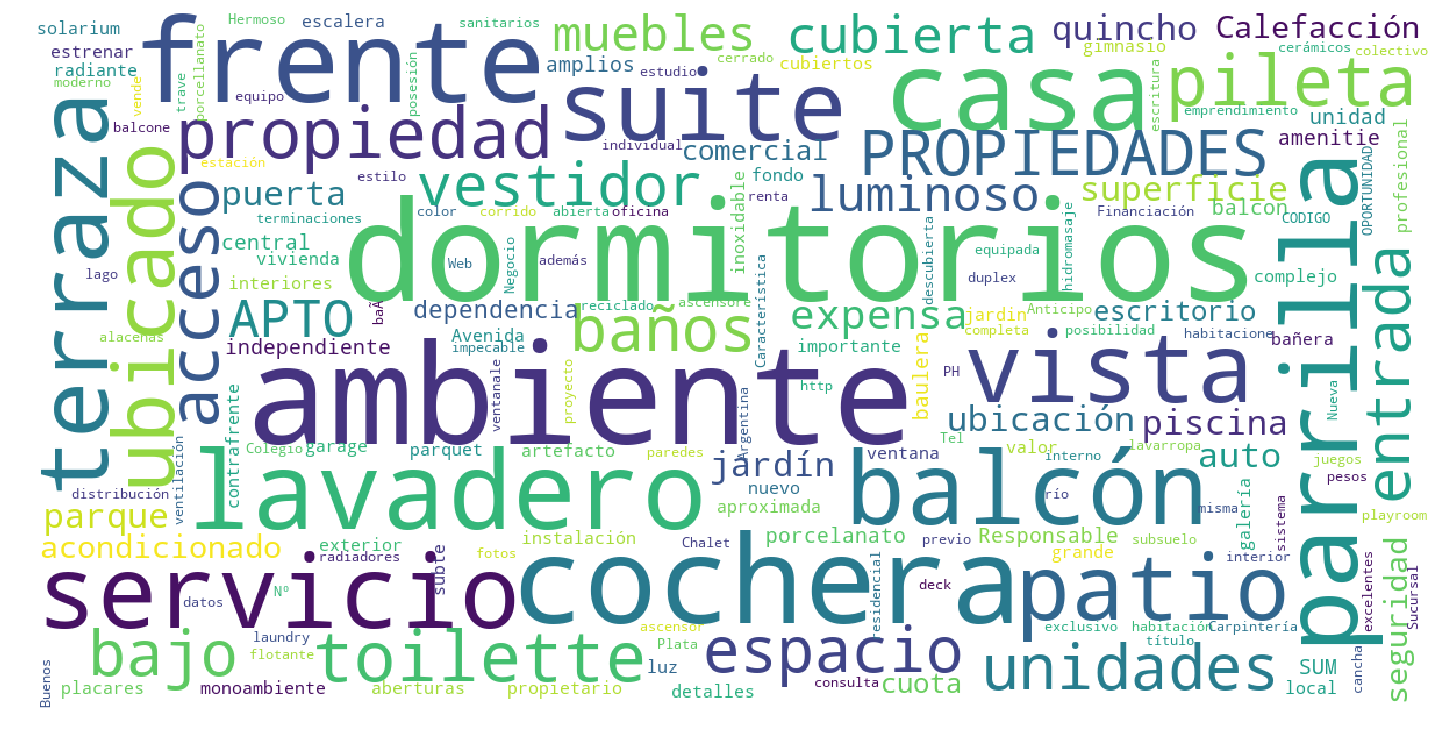

In [400]:
def show_wordcloud(obs, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=st,
        max_words=200,
        max_font_size=40, 
        scale=3, 
        collocations=False 
    ).generate(str(obs))

    fig = plt.figure(1, figsize=(25, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=30)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(obs)

### Título

In [401]:
df.titulo[21998]

'Dúplex 4 amb a estrenar c/coch'

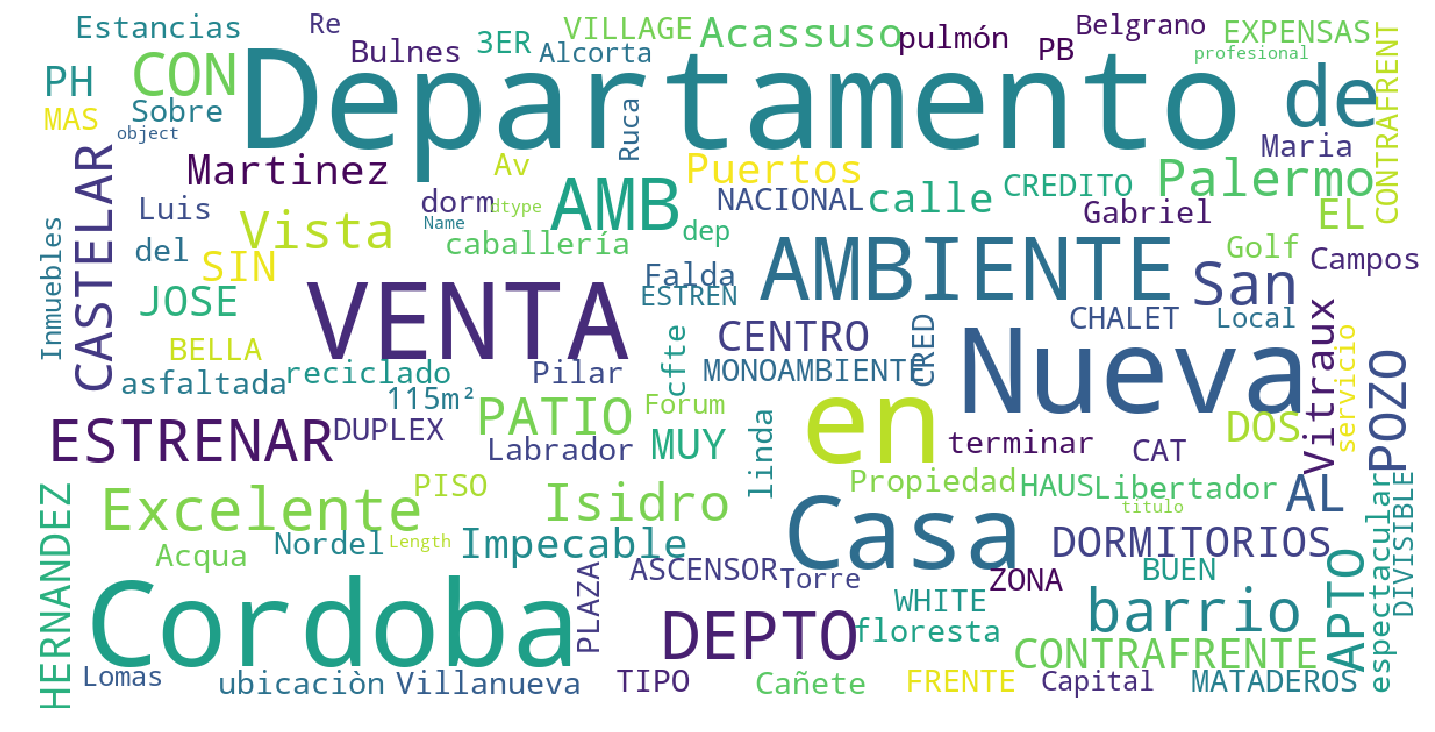

In [402]:
##Titulo

tit = df["titulo"]
def show_wordcloud(tit, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3, # chosen at random by flipping a coin; it was heads
        collocations=False 
    ).generate(str(tit))

    fig = plt.figure(1, figsize=(25, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=30)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show() 
show_wordcloud(tit)


## VARIABLES CUANTITATIVAS

El objetivo en este apartado es crear una función que pueda generar tres nuevas columnas con los valores teóricos de precio, superficie total y valor por metro cuadrado. Luego vamos a compararlos con los datos provistos y con ello evaluaremos el desvío estandar y la media. Reemplazaremos los nulos de los datos de estas variables reales y lo completaremos con los datos teóricos.
Para esto, es necesario:

* En los casos que la superficie total sea menor o nula en comparación que la cubierta, vamos a igualar estos valores considerando la superficie cubierta como la representativa de la superficie total.

* Evaluaremos como están compuestas las variables de precio, precio_usd y precio_pesos y dejaremos como variable representativa, solo la de precio_usd. Aquí, chequearemos que todos los precios en pesos, se divida por el tipo de cambio del día de la fecha del data set ($17.64). Haremos lo mismo con precio_pesos_sup para dejar solo precio_usd_sup. 

* Después de tener la mayor cantidad de datos en las variables de precio_usd, sup_total y precio_usd_sup, vamos a aplicar las siguientes ecuaciones:

        * valor teórico de precio_usd: multiplicamos sup_total y precio_usd_sup
        
        * valor teórico de superficie_total: dividimos precio_usd y precio_usd_sup
        
        * valor teórico de precio_usd_sup: dividimos precio_usd y sup_total
        
* Validamos los datos de estas tres nuevas columnas y las comparamos con las estadísticas de los datos reales. En el caso que mantengan un valor parecido, los utilizaremos para completar los nulos de los valores reales aplicando un merge.

###  Superficie

In [403]:
#Contamos los casos que la superficie total es menor o nula en comparación a la superficie cubierta

df.loc[df['sup_cubierta']>df['sup_total'],['sup_total','sup_cubierta']].count()

sup_total       1106
sup_cubierta    1106
dtype: int64

In [404]:
df['sup_total'].isnull().sum()

39325

In [405]:
df['sup_cubierta'].isnull().sum()

19904

In [406]:
df.loc[df['sup_cubierta']>df['sup_total'],['sup_total','sup_cubierta']].sample(5)

,sup_total,sup_cubierta
41858,80.0,120.0
6958,50.0,90.0
6272,150.0,200.0
102217,38.0,56.0
27460,170.0,180.0


In [407]:
#Existen 1106 casos que la superficie cubierta es mayor y 19421 casos que poseen los datos de la superficie cubierta y no de la total.
#Vamos a reemplazar los valores de la variable superficie total que sean nulos o menores a la superficie cubierta, por el valor de la superficie cubierta

df.loc[(df['sup_cubierta'].isnull())|(df['sup_total'].isnull()),['sup_cubierta','sup_total']].sample(5)


,sup_cubierta,sup_total
115212,NaN,NaN
81383,220.0,NaN
120675,180.0,NaN
103096,NaN,221.0
28564,77.0,NaN


In [408]:
# Completamos ambas columnas para que los casos que faltan serian aquellos en los que ambos datos figuran vacios
df['sup_cubierta'] = df['sup_cubierta'].fillna(df['sup_total'])
df['sup_total'] = df['sup_total'].fillna(df['sup_cubierta'])
 

In [409]:
df['sup_total'].isnull().sum()

12366

In [410]:
# reemplazar metros cubiertos por metros totales y se llama a un dataframe con los casos que se necesiten reemplazar
met_df = df.loc[df['sup_cubierta']>df['sup_total'],['sup_total']]
# ahora se cambia el nombre de la columna para realizar la actualizacion
met_df.columns=['sup_cubierta']
#realizar actualizacion en los casos que se necesiten
df.update(met_df)

In [411]:
df[df['sup_cubierta']>df['sup_total']].head()

,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo


In [412]:
que_es = df[df['sup_total']<=15]
que_es['sup_total'].sort_values(ascending=False)

52602     15.0
69442     15.0
49852     15.0
52629     15.0
38600     15.0
110469    15.0
17211     15.0
17394     15.0
68808     15.0
30447     15.0
108485    15.0
72324     15.0
107218    15.0
78487     15.0
105062    15.0
98968     15.0
8909      15.0
69467     14.0
12372     14.0
69453     14.0
69485     14.0
87544     14.0
92951     14.0
44559     14.0
17397     14.0
28456     14.0
28457     14.0
28458     14.0
28459     14.0
28868     14.0
          ... 
34770      0.0
41518      0.0
35140      0.0
35141      0.0
35143      0.0
35961      0.0
36257      0.0
36261      0.0
36808      0.0
36809      0.0
36812      0.0
36813      0.0
36814      0.0
37639      0.0
38341      0.0
39186      0.0
39187      0.0
40159      0.0
40162      0.0
40163      0.0
40165      0.0
40166      0.0
40167      0.0
41491      0.0
41496      0.0
41502      0.0
41504      0.0
41505      0.0
41508      0.0
100        0.0
Name: sup_total, Length: 770, dtype: float64

In [413]:
#Vemos que se trata de una casa con el terreno de fondo a dividir
df.iloc[12372]

tipo_inmueble                                                   house
barrio                                             Ministro Rivadavia
localizacion        |Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...
localidad                                      Bs.As. G.B.A. Zona Sur
id_geoname                                                3.43068e+06
latitud                                                           NaN
longitud                                                          NaN
precio                                                         150000
moneda                                                            ARS
precio_pesos                                                   148435
precio_usd                                                    8412.55
sup_total                                                          14
sup_cubierta                                                       14
precio_usd_sup                                                600.896
precio_pesos_sup    

In [414]:
df.observaciones.iloc[12372]

'FRACCION DE TERRENO AL FONDOA SUBDIVIDIR. AL FTE CASA DUEÑO, FONDO CONSTRUCCION DE MATERIAL SIN REVOCAR CON BAÑO TIPO RETRETE. SIN DUCHA SIN INSTALACION AGUA LUZ PRECARIA CONTRAPISOS  SIN REVOQUES.  FALTAN CIELORRASOS . SE VENDE POLIGONO INTERNO  CON ESA CONSTRUCCION . BOLETO DEL AÑO 1995  IMP AL DIA . SE PERFECCIONA POR PRESCRIPCION, CADA DUEÑO FTE Y FONDO HACE SU PLANO...    FINANCION DIRECTA. VENDIO INM MENDEZ YCIA .- Estado del inmueble: EN CONST.- Dormitorio 1: 4x3- Cuadras a estacion: 20ATENCION; PARA LAS VISITAS SE DEBERA PRESENTAR COPIA DEL DNI. -  - MENDEZ Y CIA INMOBILIARIA'

### Precio total

Evaluaremos como están compuestas las variables de precio, precio_usd y precio_pesos y dejaremos como variable representativa, solo la de 
precio_usd. Aquí, chequearemos que todos los precios en pesos, se divida por el tipo de cambio del día de la fecha del data set ($17.64). 
Haremos lo mismo con precio_pesos_sup para dejar solo precio_usd_sup. 

In [415]:
df.loc[(df['precio'].isnull()|df['precio_pesos'].isnull()|df['precio_usd'].isnull()),['precio','precio_pesos',"precio_usd"]].count()


precio          0
precio_pesos    0
precio_usd      0
dtype: int64

In [416]:
df.loc[(df['precio'].isnull()|df['precio_pesos'].isnull()),['precio','precio_pesos',"precio_usd"]].count()


precio          0
precio_pesos    0
precio_usd      0
dtype: int64

In [417]:
#En todos los casos que existen nulos, figuran en las tres variables de precios
df['precio'].isnull().sum()

20410

In [418]:
#Vamos a tomar como moneda relevante la de usd

### Precio por metro cuadrado

In [419]:
#Haremos lo mismo con precio_pesos_sup para dejar solo precio_usd_sup 
df.loc[(df['precio_pesos_sup'].isnull()|df['precio_usd_sup'].isnull()),['precio_pesos_sup',"precio_usd_sup"]].sample(5)


,precio_pesos_sup,precio_usd_sup
73827,88000.000000,NaN
49374,NaN,NaN
20226,1197.368421,NaN
113652,2636.363636,NaN
23044,NaN,NaN


In [420]:
df["precio_m2"]=df["precio_usd"]/df["sup_total"]

In [421]:
# vemos que tenemos valores infinitos en precio_m2 y los reemplazamos por Nan
df['precio_m2'].describe()

count    9.317400e+04
mean              inf
std               NaN
min      6.000000e-01
25%      1.238532e+03
50%      1.800290e+03
75%      2.485714e+03
max               inf
Name: precio_m2, dtype: float64

In [422]:
df['precio_m2'].replace([np.inf, -np.inf], np.nan, inplace = True)

In [423]:
df['precio_m2'].describe()

count    9.292500e+04
mean     2.735903e+03
std      1.729729e+04
min      6.000000e-01
25%      1.236559e+03
50%      1.800000e+03
75%      2.475610e+03
max      2.600000e+06
Name: precio_m2, dtype: float64

In [424]:
df.loc[(df['precio_pesos_sup'].isnull()|df['precio_usd_sup'].isnull()),['precio_pesos_sup',"precio_usd_sup"]].count()


precio_pesos_sup    24308
precio_usd_sup       5267
dtype: int64

In [425]:
df['precio_pesos_sup'].isnull().sum()

33559

In [426]:
df['precio_usd_sup'].isnull().sum()

52600

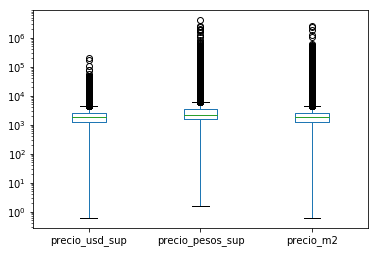

In [427]:
# analizamos los valores de los precios_m2 - Existen valores mayores a 10.000 y menores a 1.000

df[['precio_usd_sup', 'precio_pesos_sup', "precio_m2"]].plot(kind='box', logy=True)
plt.show()

In [428]:
df['precio_m2'].isnull().sum()

28292

In [429]:
# Vemos cantidad de valores con precio_m2 menores a 500 o mayores a 10.000 y los pisamos
df.loc[(df['precio_m2'] < 500) | (df['precio_m2'] > 10000) ].count()

tipo_inmueble       7683
barrio              7683
localizacion        7683
localidad           7683
id_geoname          6391
latitud             5080
longitud            5080
precio              7683
moneda              7683
precio_pesos        7683
precio_usd          7683
sup_total           7683
sup_cubierta        7683
precio_usd_sup      6208
precio_pesos_sup    7128
ambientes           3744
expensas             231
observaciones       7683
titulo              7683
precio_m2           7683
dtype: int64

In [430]:
# Pisamos valores menores a 500 y vemos su resultado

df['precio_m2'] = df['precio_m2'].apply(lambda x: 500 if x < 500 else x)
df.loc[(df['precio_m2'] < 500)].count()

tipo_inmueble       0
barrio              0
localizacion        0
localidad           0
id_geoname          0
latitud             0
longitud            0
precio              0
moneda              0
precio_pesos        0
precio_usd          0
sup_total           0
sup_cubierta        0
precio_usd_sup      0
precio_pesos_sup    0
ambientes           0
expensas            0
observaciones       0
titulo              0
precio_m2           0
dtype: int64

In [431]:
# Pisamos valores menores a 500 y vemos su resultado

df['precio_m2'] = df['precio_m2'].apply(lambda x: 1000 if x > 10000 else x)
df.loc[(df['precio_m2'] > 10000)].count()

tipo_inmueble       0
barrio              0
localizacion        0
localidad           0
id_geoname          0
latitud             0
longitud            0
precio              0
moneda              0
precio_pesos        0
precio_usd          0
sup_total           0
sup_cubierta        0
precio_usd_sup      0
precio_pesos_sup    0
ambientes           0
expensas            0
observaciones       0
titulo              0
precio_m2           0
dtype: int64

In [432]:
# Validamos que el proceso haya sacado valores extremos
df.loc[(df['precio_m2'] < 500) | (df['precio_m2'] > 10000) ].count()
df.loc[(df['precio_m2'] > 500) | (df['precio_m2'] < 10000) ].count()

tipo_inmueble       92925
barrio              92925
localizacion        92925
localidad           92925
id_geoname          77122
latitud             54050
longitud            54050
precio              92925
moneda              92925
precio_pesos        92925
precio_usd          92925
sup_total           92925
sup_cubierta        92925
precio_usd_sup      68617
precio_pesos_sup    87658
ambientes           37687
expensas            12824
observaciones       92924
titulo              92925
precio_m2           92925
dtype: int64

In [433]:
df.sample(5)

,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo,precio_m2
86210,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,Capital Federal,3428113.0,NaN,NaN,53500.0,USD,943980.75,53500.0,22.0,22.0,2431.818182,2431.818182,NaN,NaN,Unidad tipo Studio con balcón al frente. San T...,Departamento - San Telmo,2431.818182
32907,apartment,Lomas del Mirador,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Bs.As. G.B.A. Zona Oeste,3431273.0,-34.669065,-58.529518,85000.0,USD,1499782.50,85000.0,NaN,NaN,NaN,NaN,2.0,NaN,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Lomas del Mir...,NaN
3124,house,Ituzaingó,|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|,Bs.As. G.B.A. Zona Oeste,3433359.0,-34.659538,-58.693687,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,3.0,NaN,EXCELENTE DUPLEX UBICADO EN EXCELENTE ZONA CER...,U$D 130.000 - Casa en Venta - Republica Del Sa...,NaN
76042,house,Presidente Perón,|Argentina|Bs.As. G.B.A. Zona Sur|Presidente P...,Bs.As. G.B.A. Zona Sur,NaN,-34.931046,-58.380336,290000.0,USD,5116905.00,290000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de Casa en Parque Las Naciones, Preside...",CASA EN VENTA,NaN
32709,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Capital Federal,3429595.0,-34.593086,-58.396497,290000.0,USD,5116905.00,290000.0,89.0,89.0,3258.426966,3258.426966,4.0,NaN,El valor de expensas incluye Aysa.Vencimiento ...,Semipiso. Living. Comedor. 2 dormitorio(s) 1 c...,3258.426966


In [434]:

#Vemos que en todos los casos que tenemos valores nulos en la variable que sumamos "precio_m2", las variables "precio_pesos_sup" y "precio_usd_sup" no aportan nada.
df.loc[(df['precio_m2'].isnull()),['precio_pesos_sup',"precio_usd_sup"]].count()

precio_pesos_sup    0
precio_usd_sup      0
dtype: int64

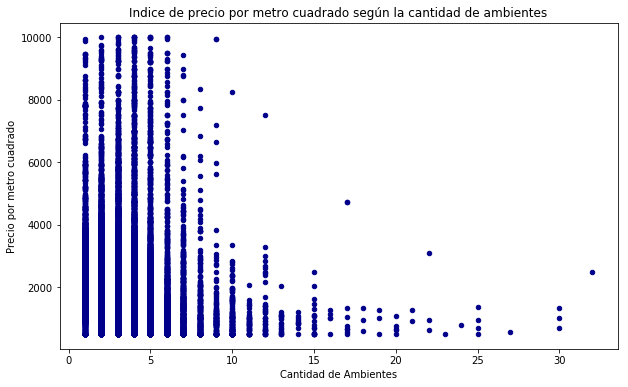

In [435]:
df.plot(kind='scatter', x='ambientes', y='precio_m2', figsize=(10, 6), color='darkblue')

plt.title('Indice de precio por metro cuadrado según la cantidad de ambientes')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Precio por metro cuadrado')

plt.show()

### Ambientes

Observamos en el análisis que el campo Ambientes, trae bastante información nula. Este campo será muy importante al momento de estimar los precios de las propiedades. También observamos que esta información generalmente está contenida en la Observaciones y Título de la publicación. Mediante la función REGEX, vamos a recupera el número de ambientes y poblar el feature correspondiente.

Text(0.5, 1.0, 'Distribución normal de Tipos de Propiedades a Vender')

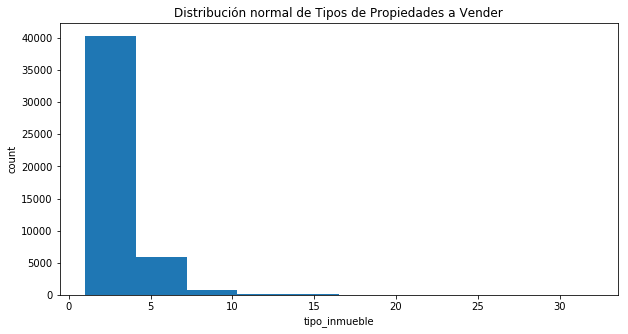

In [436]:
%matplotlib inline
df['ambientes'].plot(kind='hist', figsize=(10, 5))

# set x/y labels and plot title
plt.xlabel("tipo_inmueble")
plt.ylabel("count")
plt.title("Distribución normal de Tipos de Propiedades a Vender")

In [437]:
df.pivot_table(index='ambientes', columns="tipo_inmueble", aggfunc={'ambientes':"count"})

ambientes                        
tipo_inmueble        PH apartment   house store
ambientes                                      
1.0               118.0    6940.0   264.0  55.0
2.0               744.0   10664.0  1008.0  17.0
3.0              1301.0    7946.0  3307.0  13.0
4.0               705.0    3867.0  3361.0   4.0
5.0               263.0    1162.0  2353.0   4.0
6.0                69.0     330.0  1002.0   2.0
7.0                24.0     174.0   566.0   6.0
8.0                10.0      86.0   312.0   1.0
9.0                 5.0      34.0   145.0   NaN
10.0                4.0      22.0   197.0   3.0
11.0                1.0       9.0    62.0   NaN
12.0                1.0      12.0    52.0   NaN
13.0                1.0       3.0    29.0   NaN
14.0                NaN       5.0    22.0   NaN
15.0                NaN       2.0    24.0   NaN
16.0                NaN       NaN    11.0   NaN
17.0                NaN       3.0    13.0   NaN
18.0                NaN       1.0     5.0   NaN
19.0                NaN       NaN     4.0   NaN
20.0                1.0       2.0     8.0   NaN
21.0                NaN       1.0     4.0   NaN
22.0                NaN       2.0     6.0   NaN
23.0                NaN       NaN     2.0   NaN
24.0                NaN       NaN     1.0   NaN
25.0                NaN       1.0     3.0   NaN
27.0                NaN       NaN     1.0   NaN
28.0                NaN       NaN     1.0   NaN
29.0                NaN       NaN     1.0   NaN
30.0                NaN       NaN     4.0   NaN
31.0                NaN       NaN     1.0   NaN
32.0                NaN       2.0     1.0   NaN

In [438]:
df.iloc[69442]

tipo_inmueble                                                   house
barrio                                                          Lácar
localizacion                                |Argentina|Neuquén|Lácar|
localidad                                                     Neuquén
id_geoname                                                3.85229e+06
latitud                                                           NaN
longitud                                                          NaN
precio                                                            NaN
moneda                                                            NaN
precio_pesos                                                      NaN
precio_usd                                                        NaN
sup_total                                                         226
sup_cubierta                                                      226
precio_usd_sup                                                    NaN
precio_pesos_sup    

#### Aplicamos regex

In [439]:
#Sacamos como regex, información relevante de observaciones con la palabra "amb"

df["observaciones"] = df["observaciones"].str.lower()

In [440]:
# extaremos la info que antecede a amb (nro y letras)
df['amb_obs'] = df['observaciones'].str.extract("(\w+)\s?amb+")

In [441]:
# vemos que extraimos de la regex
df['amb_obs'].value_counts()

2                12075
3                11779
mono              7007
4                 6584
los               3715
t                 3520
dos               2625
1                 2378
5                 1852
tres              1296
un                 884
6                  544
amplios            504
c                  336
sus                336
en                 318
al                 305
cuatro             300
cada               279
con                240
de                 239
7                  220
amplio             199
y                  164
por                135
medio              121
pesos1             116
riob               101
el                  89
gran                89
                 ...  
84                   1
lavaderoun           1
4to                  1
iluminación          1
lindisimos           1
nordelta5            1
puede                1
perla3               1
pisofrente3          1
cofavi3              1
m24                  1
276                  1
variados   

In [442]:
# Paso una lista que modifique los valores en letras que obtuvimos
df_amb = pd.DataFrame({'texto':['1','un', 'mono','2', 'dos','3', 'tres','4', 'cuatro','5', 'cinco','6','seis', '7','siete', '8','ocho'], 'numero_amb':[1,1, 1, 2,2, 3,3,4, 4,5, 5,6, 6,7, 7,8, 8]})
display(df_amb)

,texto,numero_amb
0,1,1
1,un,1
2,mono,1
3,2,2
4,dos,2
5,3,3
6,tres,3
7,4,4
8,cuatro,4
9,5,5


In [443]:
df2=df.merge(df_amb, how='left', left_on='amb_obs', right_on='texto')
df2.sample(30)

,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo,precio_m2,amb_obs,texto,numero_amb
119053,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,NaN,NaN,115000.0,USD,2029117.50,115000.00,31.0,31.0,3709.677419,NaN,NaN,NaN,ambiente a estrenar de...,Departamento - Belgrano,3709.677419,NaN,NaN,NaN
78793,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,NaN,NaN,NaN,NaN,NaN,NaN,51.0,41.0,NaN,NaN,NaN,NaN,sergio villella inmobiliaria presenta departam...,Departamento - Rosario,NaN,NaN,NaN,NaN
120834,apartment,Retiro,|Argentina|Capital Federal|Retiro|,Capital Federal,3429576.0,NaN,NaN,NaN,NaN,NaN,NaN,237.0,237.0,NaN,NaN,NaN,NaN,edificio francés de categoría-...,Departamento - Retiro,NaN,NaN,NaN,NaN
101584,house,Llavallol,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Bs.As. G.B.A. Zona Sur,3431325.0,NaN,NaN,165000.0,USD,2911342.50,165000.00,240.0,240.0,NaN,687.500000,NaN,NaN,"chalet con jardin al frente, entrada de auto p...",Casa - Llavallol,687.500000,NaN,NaN,NaN
10630,house,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,-31.333344,-64.310506,380000.0,USD,6704910.00,380000.00,250.0,250.0,NaN,1520.000000,3.0,NaN,casa en venta de 3 dorm. en cordoba,CINCO LOMAS CASA EN VENTA!,1520.000000,NaN,NaN,NaN
73706,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Capital Federal,3429760.0,-34.609391,-58.362203,1250000.0,USD,22055625.00,1250000.00,188.0,188.0,6648.936170,NaN,NaN,15000.0,capital brokers propiedades | o 15-excelente ...,Venta 3 ambientes con dependencia,6648.936170,3,3,3.0
82545,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,NaN,NaN,870000.0,ARS,860924.38,48792.79,33.0,29.0,1478.569394,30000.000000,NaN,NaN,sergio villella inmobiliaria presenta el edifi...,Departamento - Echesortu,1478.569394,mono,mono,1.0
58737,house,Berazategui,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|,Bs.As. G.B.A. Zona Sur,3436042.0,-34.805298,-58.166534,510000.0,USD,8998695.00,510000.00,225.0,225.0,2266.666667,2266.666667,NaN,NaN,xintel(amb-amb-1138)casa en alquiler en abril ...,3 DORMITORIOS | LOS RETOÑOS al 100,2266.666667,los,NaN,NaN
7629,apartment,Santa Fe,|Argentina|Santa Fe|Santa Fe|,Santa Fe,3836277.0,-31.628096,-60.697328,1250000.0,ARS,1236960.43,70104.59,50.0,50.0,NaN,25000.000000,2.0,NaN,corredor responsable: marcos provvidenti - cci...,Dpto 1 dorm a estrenar. Entrega Septiembre de ...,1402.091800,NaN,NaN,NaN
116975,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,-32.943294,-60.655685,NaN,NaN,NaN,NaN,73.0,73.0,NaN,NaN,2.0,NaN,departamento en venta de un dormitorio. semipi...,DEPARTAMENTO PRONTA ENTREGA DE UN DORMITORIO F...,NaN,NaN,NaN,NaN


In [444]:
df2['numero_amb'].isnull().sum()

73560

In [445]:
# Pasamos a Nan el resto de los valores obtenidos
df.loc[~df['amb_obs'].isin([1, 2, 3, 4, 5, 6, 7, 8]),'amb_obs'] = np.nan

In [446]:
#Sacamos la regex con la palabra "amb" de titulo
# Pasamos la info de observaciones a minuscula para poder correr la regex

df["titulo"] = df["titulo"].str.lower()

In [447]:
# extaremos la info que antecede a amb (nro y letras)
df['amb_tit'] = df['titulo'].str.extract("(\w+)\s?amb+")

In [448]:
# vemos que extraimos de la regex
df['amb_tit'].value_counts()

2                7413
3                7056
4                3856
mono             3613
1                1669
5                1165
dos               971
tres              521
6                 347
un                166
7                 137
cuatro            111
cochab             47
8                  43
cinco              34
amplios            33
en                 24
riob               23
excelente          23
b                  23
amplio             16
de                 14
venta              13
9                  12
los                11
departamento       11
gran                8
c                   7
hermoso             7
l                   6
                 ... 
dpto3               1
luminoso            1
congreso            1
mpno                1
ocho                1
depto3              1
enorme              1
el                  1
soho3               1
más                 1
en3                 1
exc                 1
o                   1
bmono               1
imperdible

In [449]:
# Armo una tabla que luego me permita hacer un LEFTjoint (left para que me traiga como Nan 
# los que no estan definidos en la tabla) para pasar los textos a numeros
df_amb_tit = pd.DataFrame({'texto_tit':['1','un', 'mono','2', 'dos','3', 'tres','4', 'cuatro','5', 'cinco','6','seis', '7','siete', '8','ocho'], 'numero_amb_tit':[1,1, 1, 2,2, 3,3,4, 4,5, 5,6, 6,7, 7,8, 8]})
display(df_amb_tit)

,texto_tit,numero_amb_tit
0,1,1
1,un,1
2,mono,1
3,2,2
4,dos,2
5,3,3
6,tres,3
7,4,4
8,cuatro,4
9,5,5


In [450]:
df3=df.merge(df_amb_tit, how='left', left_on='amb_tit', right_on='texto_tit')
df3.sample(50)

,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo,precio_m2,amb_obs,amb_tit,texto_tit,numero_amb_tit
76164,house,San Clemente del Tuyú,|Argentina|Buenos Aires Costa Atlántica|San Cl...,Buenos Aires Costa Atlántica,3429160.0,NaN,NaN,130000.0,USD,2293785.00,130000.00,NaN,NaN,NaN,NaN,NaN,NaN,sobre la calle 14 nº 499 esquina nº 7 (san cl...,vende:chalet,NaN,NaN,NaN,NaN,NaN
20903,PH,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Capital Federal,3433775.0,-34.570372,-58.507366,179000.0,USD,3158365.50,179000.00,84.0,84.0,NaN,2130.952381,3.0,NaN,corredor responsable: uno bienes raices srl - ...,excelente ph 3 ambientes más playroom gran ter...,2130.952381,NaN,3,3,3.0
108559,house,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Bs.As. G.B.A. Zona Sur,3432039.0,NaN,NaN,190000.0,USD,3352455.00,190000.00,150.0,150.0,NaN,1266.666667,NaN,NaN,propiedad desarrollada sobre excelente lote de...,casa - la plata,1266.666667,NaN,NaN,NaN,NaN
41918,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Bs.As. G.B.A. Zona Norte,NaN,-34.418351,-58.577936,169000.0,USD,2981920.50,169000.00,74.0,70.0,2283.783784,2414.285714,3.0,NaN,"departamento tres ambientes, dos baños.ubicado...",departamento tres ambientes a estrenar,2283.783784,NaN,tres,tres,3.0
82257,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,NaN,NaN,80000.0,USD,1411560.00,80000.00,58.0,53.0,1379.310345,1509.433962,NaN,NaN,"departamento, practicamente nuevo ,cuenta con ...",departamento apto banco en 1 e/ 64 y 65,1379.310345,NaN,NaN,NaN,NaN
45873,house,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Buenos Aires Interior,3865084.0,-38.692658,-62.236222,1250000.0,ARS,1236960.43,70104.59,NaN,NaN,NaN,NaN,1.0,NaN,"casa tipo loft, en venta: avenida cabrera 4600...",casa tipo loft,NaN,NaN,NaN,NaN,NaN
100869,house,Estancias del Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Esta...,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,250000.0,USD,4411125.00,250000.00,191.0,145.0,1308.900524,1724.137931,NaN,NaN,"excelente casa 4 ambientes, a estrenar desarro...",casa - estancias del pilar,1308.900524,NaN,NaN,NaN,NaN
65839,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,264000.0,USD,4658148.00,264000.00,190.0,150.0,1389.473684,1760.000000,NaN,NaN,impecable dúplex de excelente categoría sobre ...,excelente duplex en esquina,1389.473684,NaN,NaN,NaN,NaN
35261,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,-32.951523,-60.648173,NaN,NaN,NaN,NaN,132.0,60.0,NaN,NaN,2.0,NaN,españa 1319la mejor calidad en la mejor ubicac...,1 dormitorio con terraza exclusiva - zona centro,NaN,NaN,NaN,NaN,NaN
68230,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Bs.As. G.B.A. Zona Norte,3429979.0,NaN,NaN,118000.0,USD,2082051.00,118000.00,85.0,85.0,1388.235294,1388.235294,NaN,2700.0,departamento con muy buena ubicación dentro de...,impecable departamento en condominio northville,1388.235294,NaN,NaN,NaN,NaN


In [451]:
df3['numero_amb_tit'].value_counts()
# Observamos que el segmento más importante es de 1 a 8 ambientes

2.0    8384
3.0    7577
1.0    5448
4.0    3967
5.0    1199
6.0     352
7.0     140
8.0      44
Name: numero_amb_tit, dtype: int64

In [452]:
df3['numero_amb_tit'].value_counts().sum()

27111

In [453]:
df3['numero_amb_tit'].isnull().sum()

94106

In [454]:
df["ambientes"].fillna(df3["numero_amb_tit"], inplace=True)
df['ambientes'].isnull().sum()

61965

In [455]:
#Sacamos la regex con la palabra "habitaciones" de observaciones

df['amb_obse'] = df['observaciones'].str.extract("(\w+)\s?hab+")
df['amb_obse'].sample(30)

17520     NaN
13290     NaN
44401     NaN
20426     NaN
116986    NaN
36654     NaN
107991    NaN
94964     NaN
26016     NaN
36955     NaN
4943      NaN
112598    NaN
62790     NaN
81690     NaN
85188     NaN
92737     NaN
28341     sus
43529     NaN
53833     NaN
84184     NaN
42798     NaN
99175     NaN
39513     NaN
1610      NaN
49175     NaN
60752     NaN
26496     NaN
104427    NaN
113858    NaN
36532     NaN
Name: amb_obse, dtype: object

In [456]:
# Armo una tabla que luego me permita hacer un LEFTjoint (left para que me traiga como Nan 
# los que no estan definidos en la tabla) para pasar los textos a numeros
df_amb2 = pd.DataFrame({'texto2':['1','un', 'mono','2', 'dos','3', 'tres','4', 'cuatro','5', 'cinco','6','seis', '7','siete', '8','ocho'], 'numero_amb2':[2,2, 2, 3,3, 4,4,5, 5,6, 6,7, 7,8, 8,9, 9]})
display(df_amb2)

,texto2,numero_amb2
0,1,2
1,un,2
2,mono,2
3,2,3
4,dos,3
5,3,4
6,tres,4
7,4,5
8,cuatro,5
9,5,6


In [457]:
# Vamos a chequear si ambientes = dormitorios + 1  ## QUE SE FIJE FRANCISCOOOO
#df3=df2.merge(df_amb2, how='left', left_on='amb_obse', right_on='texto2') 
#df3.pivot_table(index=['numero_amb','numero_amb2'], aggfunc={'ambientes':"count"})

In [458]:
print(df['amb_obs'].value_counts())
df['amb_obs'].isnull().sum()


Series([], Name: amb_obs, dtype: int64)


121217

In [459]:
df.ambientes.isnull().sum()

61965

In [460]:
media = df['ambientes'].mean()
desvio = df['ambientes'].std()
len(df.loc[df['ambientes']>(media +3*desvio),['ambientes']])

712

In [461]:
#Vamos a continuar trabajando con el df de menos de 8 ambientes
df_amb_8= df[df.ambientes < 9]
df.update(df_amb_8)


In [462]:
df.ambientes.drop(range(8, 32),axis=0)

0         2.0
1         NaN
2         2.0
3         3.0
4         2.0
5         NaN
6         NaN
7         1.0
32        3.0
33        3.0
34        6.0
35        4.0
36        NaN
37        NaN
38        3.0
39        NaN
40        3.0
41        4.0
42        NaN
43        1.0
44        NaN
45        1.0
46        4.0
47        NaN
48        5.0
49        NaN
50        4.0
51        6.0
52        3.0
53        2.0
         ... 
121190    NaN
121191    NaN
121192    NaN
121193    NaN
121194    NaN
121195    NaN
121196    NaN
121197    NaN
121198    NaN
121199    NaN
121200    NaN
121201    NaN
121202    NaN
121203    NaN
121204    NaN
121205    NaN
121206    NaN
121207    NaN
121208    NaN
121209    NaN
121210    NaN
121211    NaN
121212    3.0
121213    NaN
121214    NaN
121215    2.0
121216    NaN
121217    NaN
121218    NaN
121219    NaN
Name: ambientes, Length: 121193, dtype: float64

In [463]:
# topeamos a 8 ambientes max
df.loc[(df['ambientes'] > 9)].count()


tipo_inmueble       528
barrio              528
localizacion        528
localidad           528
id_geoname          503
latitud             410
longitud            410
precio              359
moneda              359
precio_pesos        359
precio_usd          359
sup_total           414
sup_cubierta        414
precio_usd_sup       91
precio_pesos_sup    320
ambientes           528
expensas              0
observaciones       528
titulo              528
precio_m2           330
amb_obs               0
amb_tit               7
amb_obse            148
dtype: int64

In [464]:
# topeamos a 8 ambientes max
df['ambientes'] = df['ambientes'].apply(lambda x: 8 if x > 8 else x)
df.loc[(df['ambientes'] > 8)].count()


tipo_inmueble       0
barrio              0
localizacion        0
localidad           0
id_geoname          0
latitud             0
longitud            0
precio              0
moneda              0
precio_pesos        0
precio_usd          0
sup_total           0
sup_cubierta        0
precio_usd_sup      0
precio_pesos_sup    0
ambientes           0
expensas            0
observaciones       0
titulo              0
precio_m2           0
amb_obs             0
amb_tit             0
amb_obse            0
dtype: int64

In [465]:
df_1=df.loc[:,["ambientes","precio_usd","sup_total","tipo_inmueble", "localidad", "barrio"]]
df_pivot=df_1.pivot_table((df_1[df_1['ambientes']< 8]), index=["tipo_inmueble","localidad",'barrio'], columns="ambientes", aggfunc={'sup_total':"count"},  fill_value=0)
df_pivot

sup_total  \
ambientes                                                               1.0   
tipo_inmueble localidad                barrio                                 
PH            Bs.As. G.B.A. Zona Norte Acassuso                           1   
                                       Beccar                             3   
                                       Bella Vista                        0   
                                       Belén de Escobar                   0   
                                       Billinghurst                       0   
                                       Boulogne Sur Mer                   0   
                                       Bs.As. G.B.A. Zona Norte           0   
                                       Carapachay                         1   
                                       Don Torcuato                       1   
                                       Escobar                            0   
                                       Florida                            5   
                                       Florida Oeste                      0   
                                       General Pacheco                    0   
                                       General San Martín                 6   
                                       Ingeniero Adolfo Sourdeaux         0   
                                       Jose Leon Suarez                   0   
                                       José C Paz                         0   
                                       La Lucila                          1   
                                       Malvinas Argentinas                0   
                                       Martínez                           1   
                                       Maschwitz                          0   
                                       Munro                              3   
                                       Muñiz                              0   
                                       Nordelta                           0   
                                       Olivos                             2   
                                       Pilar                              0   
                                       Ricardo Rojas                      0   
                                       San Andres                         1   
                                       San Fernando                       0   
                                       San Isidro                         0   
...                                                                     ...   
store         Chubut                   Chubut                             0   
                                       Cushamen                           1   
              Corrientes               Ituzaingó                          4   
              Córdoba                  Córdoba                            9   
                                       Punilla                            2   
                                       Villa Carlos Paz                   0   
                                       Achiras                            1   
                                       Río Tercero                        1   
                                       San Francisco                      0   
                                       Villa General Belgrano             2   
                                       Jesús María                        0   
                                       Villa Los Aromos                   0   
              Entre Ríos               Costa Uruguay Sur                  0   
              Mendoza                  San Rafael                         0   
                                       Godoy Cruz                         0   
                                       Maipú                              0   
                                       Mendoza                            1   
                                     

In [495]:
df_1=df.loc[:,["ambientes","precio_usd","sup_total","tipo_inmueble", "localidad", "barrio"]]
df_pivot=df_1.pivot_table((df_1[df_1['localidad'] == 'Capital Federal']  ), index=["tipo_inmueble","localidad",'barrio'], columns="ambientes", aggfunc={'precio_usd':"mean"},  fill_value=0)
df_pivot

precio_usd  \
ambientes                                                                   1.0   
tipo_inmueble localidad                barrio                                     
PH            Bs.As. G.B.A. Zona Norte Acassuso                    8.000000e+04   
                                       Beccar                      1.183333e+05   
                                       Bella Vista                 0.000000e+00   
                                       Belén de Escobar            0.000000e+00   
                                       Billinghurst                0.000000e+00   
                                       Boulogne Sur Mer            0.000000e+00   
                                       Bs.As. G.B.A. Zona Norte    0.000000e+00   
                                       Carapachay                  8.300000e+04   
                                       Don Torcuato                1.600000e+05   
                                       Escobar                     0.000000e+00   
                                       Florida                     1.572000e+05   
                                       Florida Oeste               0.000000e+00   
                                       General Pacheco             0.000000e+00   
                                       General San Martín          7.233333e+04   
                                       Ingeniero Adolfo Sourdeaux  0.000000e+00   
                                       Jose Leon Suarez            0.000000e+00   
                                       José C Paz                  0.000000e+00   
                                       La Lucila                   1.149000e+05   
                                       Malvinas Argentinas         0.000000e+00   
                                       Martínez                    1.500000e+05   
                                       Maschwitz                   0.000000e+00   
                                       Munro                       1.080000e+05   
                                       Muñiz                       0.000000e+00   
                                       Nordelta                    0.000000e+00   
                                       Olivos                      1.010000e+05   
                                       Pilar                       0.000000e+00   
                                       Ricardo Rojas               0.000000e+00   
                                       San Andres                  1.200000e+05   
                                       San Fernando                0.000000e+00   
                                       San Isidro                  0.000000e+00   
...                                                                         ...   
store         Capital Federal          Villa Ortuzar               1.950000e+05   
                                       Villa Urquiza               6.500000e+04   
                                       Villa del Parque            4.950000e+05   
                                       Catalinas                   0.000000e+00   
                                       Centro / Microcentro        0.000000e+00   
                                       Palermo Chico               0.000000e+00   
                                       Puerto Madero               7.800000e+05   
                                       Retiro                      1.390298e+06   
              Chubut                   Escalante                   0.000000e+00   
                                       Cushamen                    4.300000e+05   
              Corrientes               Ituzaingó                   8.750000e+04   
              Córdoba                  Córdoba                     8.319668e+04   
                                       Punilla                     1.330000e+06   
                                       Villa Carlos Paz            0.000000e+00   
                                       Villa General Belgrano      2.495501e+05   
  

In [466]:
df_1=df.loc[:,["ambientes","precio_usd","sup_total","tipo_inmueble", "localidad", "barrio"]]
df_pivot=df_1.pivot_table((df_1[df_1['ambientes']< 8]), index=["tipo_inmueble","localidad",'barrio'], columns="ambientes", aggfunc={'sup_total':"mean"},  fill_value=0)
df_pivot

sup_total  \
ambientes                                                                 1.0   
tipo_inmueble localidad                barrio                                   
PH            Bs.As. G.B.A. Zona Norte Acassuso                     26.000000   
                                       Beccar                       73.333333   
                                       Bella Vista                   0.000000   
                                       Belén de Escobar              0.000000   
                                       Billinghurst                  0.000000   
                                       Boulogne Sur Mer              0.000000   
                                       Bs.As. G.B.A. Zona Norte      0.000000   
                                       Carapachay                   64.000000   
                                       Don Torcuato                100.000000   
                                       Escobar                       0.000000   
                                       Florida                      90.600000   
                                       Florida Oeste                 0.000000   
                                       General Pacheco               0.000000   
                                       General San Martín           69.666667   
                                       Ingeniero Adolfo Sourdeaux    0.000000   
                                       Jose Leon Suarez              0.000000   
                                       José C Paz                    0.000000   
                                       La Lucila                    50.000000   
                                       Malvinas Argentinas           0.000000   
                                       Martínez                     52.000000   
                                       Maschwitz                     0.000000   
                                       Munro                        65.666667   
                                       Muñiz                         0.000000   
                                       Nordelta                      0.000000   
                                       Olivos                       31.500000   
                                       Pilar                         0.000000   
                                       Ricardo Rojas                 0.000000   
                                       San Andres                   95.000000   
                                       San Fernando                  0.000000   
                                       San Isidro                    0.000000   
...                                                                       ...   
store         Capital Federal          Centro / Microcentro          0.000000   
                                       Palermo Chico                 0.000000   
                                       Puerto Madero                 0.000000   
                                       Retiro                      455.000000   
              Chubut                   Escalante                     0.000000   
                                       Trelew                       10.000000   
                                       Cushamen                    365.000000   
              Corrientes               Ituzaingó                   128.500000   
              Córdoba                  Córdoba                     110.222222   
                                       Punilla                      91.000000   
                                       Villa Carlos Paz              0.000000   
                                       Achiras                       1.000000   
                                       Río Tercero                 170.000000   
                                       Villa General Belgrano       41.000000   
                                       Villa Los Aromos              0.000000   
              Entre Ríos               Costa Uruguay Sur             0.000000   
              Mend

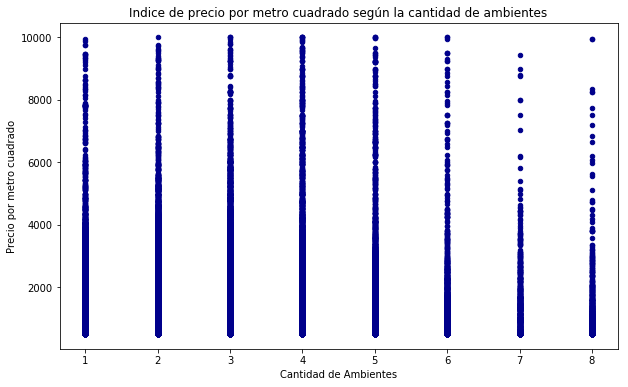

In [467]:
df.plot(kind='scatter', x='ambientes', y='precio_m2', figsize=(10, 6), color='darkblue')

plt.title('Indice de precio por metro cuadrado según la cantidad de ambientes')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Precio por metro cuadrado')

plt.show()

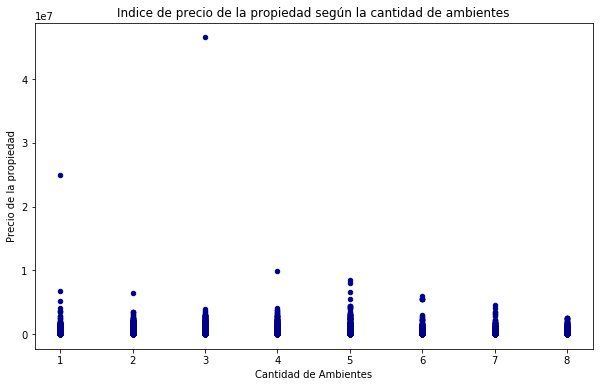

In [468]:
df.plot(kind='scatter', x='ambientes', y='precio_usd', figsize=(10, 6), color='darkblue')

plt.title('Indice de precio de la propiedad según la cantidad de ambientes')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Precio de la propiedad')

plt.show()

### Latitud y Longitud

In [469]:
import seaborn as sns

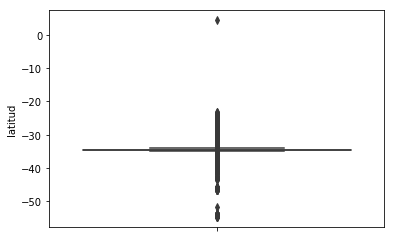

In [470]:
sns.boxplot(x='latitud', data=df, orient='v', color='c') 
plt.show()

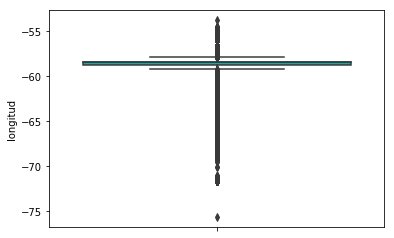

In [471]:
sns.boxplot(x='longitud', data=df, orient='v', color='c') 
plt.show()

In [472]:

# evaluando los valores de latitud y longitud de base. Deteccion de outliers fuera de los limites de argentina 
df[(df['latitud'] < -55)]


,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo,precio_m2,amb_obs,amb_tit,amb_obse


In [473]:
df[(df['latitud'] > -22)]


,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo,precio_m2,amb_obs,amb_tit,amb_obse
9761,house,Córdoba,|Argentina|Córdoba|,Córdoba,3860255.0,4.545843,-75.678931,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0,NaN,casa en venta de 2 dorm. en armenia,se vende casa en el barrio el limonar,NaN,NaN,NaN,NaN


In [474]:
df[(df['longitud'] < -75)]


,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo,precio_m2,amb_obs,amb_tit,amb_obse
9761,house,Córdoba,|Argentina|Córdoba|,Córdoba,3860255.0,4.545843,-75.678931,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0,NaN,casa en venta de 2 dorm. en armenia,se vende casa en el barrio el limonar,NaN,NaN,NaN,NaN


In [475]:
df[(df['longitud'] > -55)]


,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_sup,precio_pesos_sup,ambientes,expensas,observaciones,titulo,precio_m2,amb_obs,amb_tit,amb_obse
7427,house,Campo Grande,|Argentina|Misiones|Campo Grande|,Misiones,3435789.0,-27.145657,-54.873122,175000.0,USD,3087787.50,175000.00,300.0,300.0,583.333333,NaN,NaN,NaN,codigo: 1834-b002 ubicado en: casa en campo gr...,campo grande misiones,583.333333,NaN,NaN,NaN
7658,house,Misiones,|Argentina|Misiones|,Misiones,3430657.0,-25.971294,-54.560043,99500.0,USD,1755627.75,99500.00,1200.0,420.0,82.916667,236.904762,NaN,NaN,"chalet centrico, living c/hogar, cocina, come...",wanda-misiones,500.000000,NaN,NaN,NaN
7767,house,Misiones,|Argentina|Misiones|,Misiones,3430657.0,-25.901886,-54.608075,920000.0,ARS,910402.91,51596.98,1300.0,80.0,39.689985,11500.000000,NaN,NaN,se vende casa de material:sobre ruta asfaltada...,casa s/ruta 103 con amplio terreno,500.000000,NaN,NaN,NaN
20359,house,Puerto Libertad,|Argentina|Misiones|Puerto Libertad|,Misiones,3429764.0,-25.921350,-54.580379,1400000.0,ARS,1385395.67,78517.14,NaN,NaN,NaN,NaN,NaN,NaN,hermoso chaletchalet ubicado en pleno centro d...,chalet pto libertad,NaN,NaN,NaN,dos
22395,house,Puerto Esperanza,|Argentina|Misiones|Puerto Esperanza|,Misiones,3429786.0,-26.024240,-54.614367,1100000.0,ARS,1088525.19,61692.04,NaN,NaN,NaN,NaN,NaN,NaN,"se vende hermosa casa totalmente reciclada, ub...",puerto esperanza - hermosa casa en el centro.,NaN,NaN,NaN,NaN
27352,house,El Dorado,|Argentina|Misiones|El Dorado|,Misiones,NaN,-26.413693,-54.618777,85000.0,USD,1499782.50,85000.00,80.0,80.0,NaN,1062.500000,3.0,NaN,contacto: briant gauna - mls id # 420381044-38...,casa en venta en eldorado,1062.500000,NaN,NaN,NaN
30538,house,Misiones,|Argentina|Misiones|,Misiones,3430657.0,-26.410396,-54.600724,400000.0,USD,7057800.00,400000.00,NaN,NaN,NaN,NaN,4.0,NaN,espectacular casa en el centro de la ciudad de...,venta hermosa casa en eldorado,NaN,NaN,NaN,NaN
36224,house,Misiones,|Argentina|Misiones|,Misiones,3430657.0,-26.566497,-54.779613,800000.0,ARS,791654.72,44866.94,20.0,20.0,NaN,40000.000000,NaN,NaN,contacto: amalia peralta - mls id # 420381057-...,vendo casa 3 dormitorios. 18x75 en montecarlo,2243.347000,NaN,NaN,NaN
41203,house,Puerto Iguazú,|Argentina|Misiones|Puerto Iguazú|,Misiones,3429777.0,-25.611866,-54.580727,145000.0,USD,2558452.50,145000.00,20.0,20.0,NaN,7250.000000,5.0,NaN,contacto: briant gauna - mls id # 420381044-41...,casa en puerto iguazú en venta,7250.000000,NaN,NaN,NaN
43399,house,Misiones,|Argentina|Misiones|,Misiones,3430657.0,-25.967006,-54.559587,1400000.0,ARS,1385395.67,78517.14,450.0,360.0,174.482533,3888.888889,NaN,NaN,casa familiar con local comercial- 3 dormitori...,wanda,500.000000,NaN,NaN,NaN


## Conclusiones

In [476]:
#Eliminamos columnas irrelevantes
#df.drop(columns="moneda", inplace=True)
df.drop(columns="precio_pesos_sup", inplace=True)
df.drop(columns="precio_usd_sup", inplace=True)
df.drop(columns="precio", inplace=True)
df.drop(columns="precio_pesos", inplace=True)
df.drop(columns="sup_cubierta", inplace=True)

In [477]:
df.describe()

,id_geoname,latitud,longitud,precio_usd,sup_total,ambientes,expensas,precio_m2
count,1.025000e+05,69670.000000,69670.000000,1.008070e+05,108851.000000,59252.000000,1.426200e+04,92925.000000
mean,3.574443e+06,-34.626210,-59.266290,2.394757e+05,211.393878,2.944154,5.009234e+03,1924.017146
std,3.541343e+05,1.980936,2.299922,3.847189e+05,1656.437195,1.530361,1.204403e+05,1122.546873
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000,1.000000,1.000000e+00,500.000000
25%,3.430234e+06,-34.669065,-58.727040,8.973388e+04,50.000000,2.000000,1.000000e+03,1182.795699
50%,3.433910e+06,-34.597985,-58.480128,1.450000e+05,83.000000,3.000000,2.000000e+03,1756.410256
75%,3.836668e+06,-34.441299,-58.395908,2.650000e+05,190.000000,4.000000,4.000000e+03,2405.405405
max,6.948895e+06,4.545843,-53.733330,4.654544e+07,200000.000000,8.000000,1.000150e+07,10000.000000


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121217 entries, 0 to 121219
Data columns (total 18 columns):
tipo_inmueble    121217 non-null object
barrio           121217 non-null object
localizacion     121217 non-null object
localidad        121217 non-null object
id_geoname       102500 non-null float64
latitud          69670 non-null float64
longitud         69670 non-null float64
moneda           100806 non-null object
precio_usd       100807 non-null float64
sup_total        108851 non-null float64
ambientes        59252 non-null float64
expensas         14262 non-null float64
observaciones    121215 non-null object
titulo           121217 non-null object
precio_m2        92925 non-null float64
amb_obs          0 non-null object
amb_tit          27529 non-null object
amb_obse         10267 non-null object
dtypes: float64(8), object(10)
memory usage: 22.6+ MB


Text(0.5, 1.0, 'Distribución normal de la cantidad de ambientes')

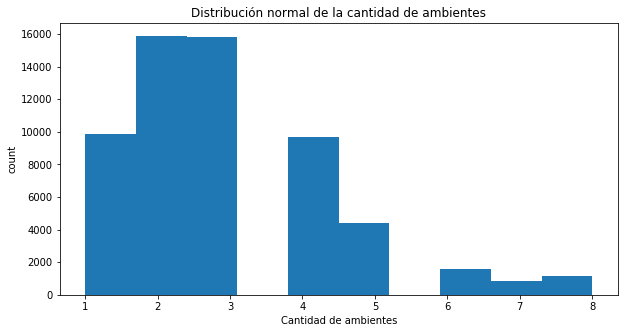

In [479]:
## histograma de propiedades por tipo de ambientes
%matplotlib inline
df['ambientes'].plot(kind='hist', figsize=(10, 5))

# set x/y labels and plot title
plt.xlabel("Cantidad de ambientes")
plt.ylabel("count")
plt.title("Distribución normal de la cantidad de ambientes")

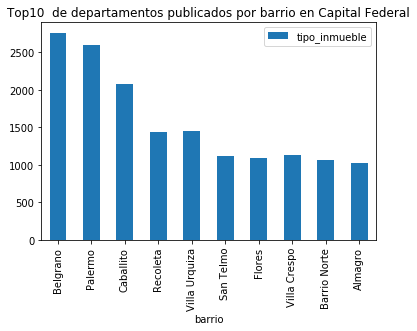

In [480]:
# top 10 de cantidades de departamentos por barrios de caba
df[   (df['tipo_inmueble'] == 'apartment') &  (df['localidad'] == 'Capital Federal' )
              ].groupby(by='barrio').count()\
                .reset_index().sort_values(by='precio_m2',ascending=False).head(10)\
                .plot.bar(y='tipo_inmueble',x='barrio',title='Top10  de departamentos publicados por barrio en Capital Federal')

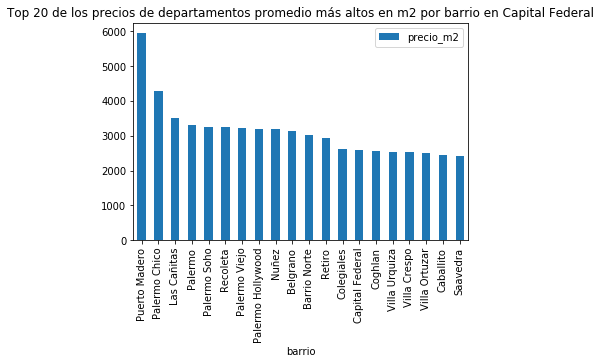

In [481]:
# top 20 de valor x M2 de departamentos por barrios de caba
df[   (df['tipo_inmueble'] == 'apartment') &  (df['localidad'] == 'Capital Federal' )
              ].groupby(by='barrio').mean()\
                .reset_index().sort_values(by='precio_m2',ascending=False).head(20)\
                .plot.bar(y='precio_m2',x='barrio',title='Top 20 de los precios de departamentos promedio más altos en m2 por barrio en Capital Federal')

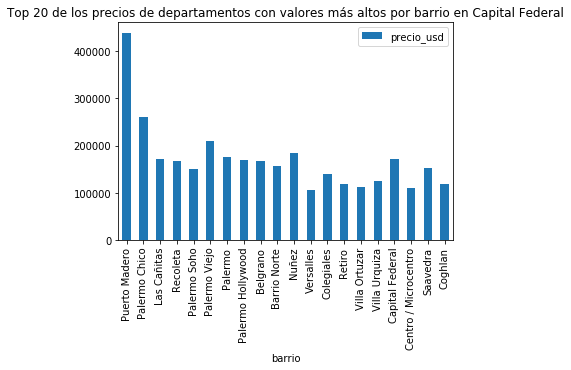

In [482]:
# top 20 de precios de departamentos por barrios de caba para parejas (1 y 2 ambientes)
df[   (df['tipo_inmueble'] == 'apartment') &  (df['localidad'] == 'Capital Federal' ) & (df['ambientes'] <= 2 )
              ].groupby(by='barrio').mean()\
                .reset_index().sort_values(by='precio_m2',ascending=False).head(20)\
                .plot.bar(y='precio_usd',x='barrio',title='Top 20 de los precios de departamentos con valores más altos por barrio en Capital Federal')

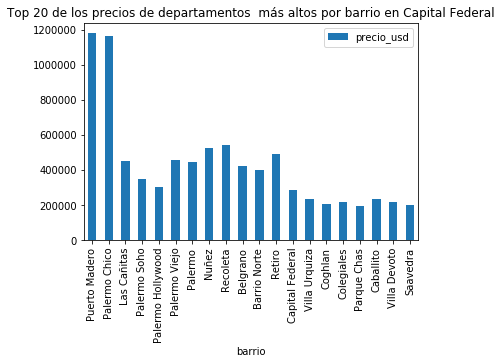

In [483]:
# top 20 de precios de departamentos por barrios de caba para familias (mayor 2 ambientes)
df[   (df['tipo_inmueble'] == 'apartment') &  (df['localidad'] == 'Capital Federal' ) & (df['ambientes'] > 2 )
              ].groupby(by='barrio').mean()\
                .reset_index().sort_values(by='precio_m2',ascending=False).head(20)\
                .plot.bar(y='precio_usd',x='barrio',title='Top 20 de los precios de departamentos  más altos por barrio en Capital Federal')

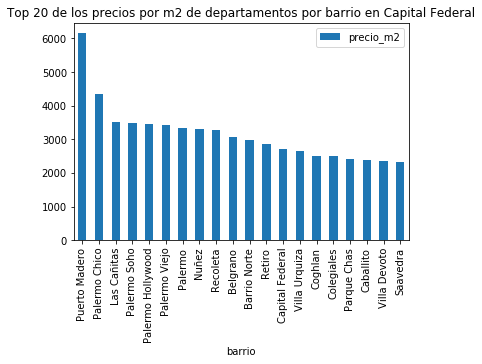

In [484]:
# top 20 de precios por m2 de departamentos por barrios de caba para familias (mayor 2 ambientes)
df[   (df['tipo_inmueble'] == 'apartment') &  (df['localidad'] == 'Capital Federal' ) & (df['ambientes'] > 2 )
              ].groupby(by='barrio').mean()\
                .reset_index().sort_values(by='precio_m2',ascending=False).head(20)\
                .plot.bar(y='precio_m2',x='barrio',title='Top 20 de los precios por m2 de departamentos por barrio en Capital Federal')

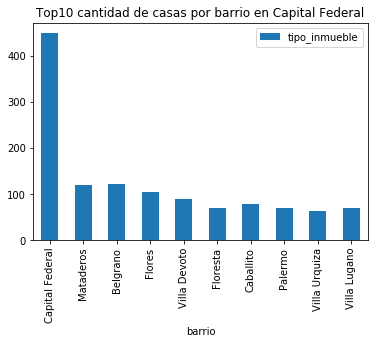

In [487]:
# top 10 de cantidades de casas por barrios de caba
df[   (df['tipo_inmueble'] == 'house') &  (df['localidad'] == 'Capital Federal' )
              ].groupby(by='barrio').count()\
                .reset_index().sort_values(by='precio_m2',ascending=False).head(10)\
                .plot.bar(y='tipo_inmueble',x='barrio',title='Top10 cantidad de casas por barrio en Capital Federal')

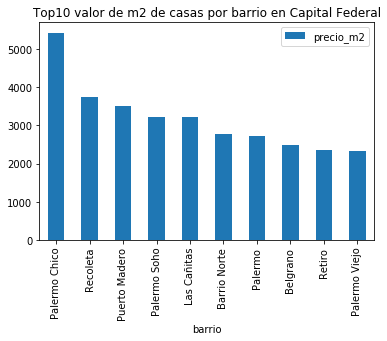

In [489]:
# top 10 de valor de m2 de casas por barrios de caba
df[   (df['tipo_inmueble'] == 'house') &  (df['localidad'] == 'Capital Federal' )
              ].groupby(by='barrio').mean()\
                .reset_index().sort_values(by='precio_m2',ascending=False).head(10)\
                .plot.bar(y='precio_m2',x='barrio',title='Top10 valor de m2 de casas por barrio en Capital Federal')

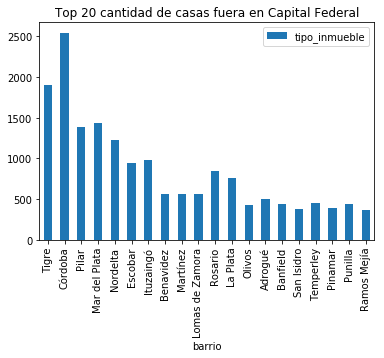

In [491]:
# top 20 de cantidades de casas fuera de caba
df[   (df['tipo_inmueble'] == 'house') &  (df['localidad'] != 'Capital Federal' )
              ].groupby(by='barrio').count()\
                .reset_index().sort_values(by='precio_m2',ascending=False).head(20)\
                .plot.bar(y='tipo_inmueble',x='barrio',title='Top 20 cantidad de casas fuera en Capital Federal')

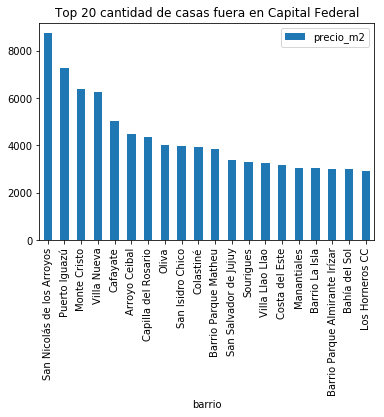

In [492]:
# top 20 de cantidades de casas fuera de caba
df[   (df['tipo_inmueble'] == 'house') &  (df['localidad'] != 'Capital Federal' )
              ].groupby(by='barrio').mean()\
                .reset_index().sort_values(by='precio_m2',ascending=False).head(20)\
                .plot.bar(y='precio_m2',x='barrio',title='Top 20 cantidad de casas fuera en Capital Federal')

In [493]:
# vemos que correlacion hay entre todas las variables del df
df.corr()

,id_geoname,latitud,longitud,precio_usd,sup_total,ambientes,expensas,precio_m2
id_geoname,1.000000,0.166446,-0.293347,-0.042977,-0.001363,0.047582,-0.002737,-0.084232
latitud,0.166446,1.000000,-0.294338,0.067063,0.007670,0.072981,0.004696,-0.010335
longitud,-0.293347,-0.294338,1.000000,-0.026092,-0.028561,-0.127163,-0.002614,0.146921
precio_usd,-0.042977,0.067063,-0.026092,1.000000,0.267128,0.171374,0.011010,0.180188
sup_total,-0.001363,0.007670,-0.028561,0.267128,1.000000,0.066392,0.000426,-0.071993
ambientes,0.047582,0.072981,-0.127163,0.171374,0.066392,1.000000,-0.009856,-0.122852
expensas,-0.002737,0.004696,-0.002614,0.011010,0.000426,-0.009856,1.000000,0.018235
precio_m2,-0.084232,-0.010335,0.146921,0.180188,-0.071993,-0.122852,0.018235,1.000000
